In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
import time
from selenium.webdriver.firefox.firefox_binary import FirefoxBinary
from urllib.parse import urljoin

## Page Crawl (JB HI FI)

In [2]:
## Using Firefox

name = []
price = []

#alpha = ['a', 'c', 'e', 'g', 'i', 'k', 'm', 'o', 'q', 's', 'u', 'w', 'y']


#for alphabet in alpha:
for i in range(1, 3):

      url = "https://www.jbhifi.com.au/search?query=laptop&page=" + str(i)
      print(url)


      #options = Options()
      #options.add_argument('--headless')

      binary = FirefoxBinary('C:/Program Files/Mozilla Firefox/firefox.exe')
      driver = webdriver.Firefox(firefox_binary = binary, 
                                 executable_path = r'C:\Users\Jin\Documents\Webscraping\Drivers\geckodriver.exe'
                                 #options = options
                                )
      driver.get(url)

      soup = BeautifulSoup(driver.page_source, 'lxml')

      ii = 0

      for item in soup.findAll("h4", {'class': 'ais-hit--title product-tile__title'}):
            ii = ii + 1
            name.append(item.get_text(strip=True))

      for item in soup.findAll(["span"], {'class': ['ais-hit--price price', 'sale']}, limit = ii):
            price.append(item.get_text(strip=True))

      driver.close()

https://www.jbhifi.com.au/search?query=laptop&page=1
https://www.jbhifi.com.au/search?query=laptop&page=2


In [3]:
## Using Chrome

name = []
price = []


for i in range(1, 3):

      url = "https://www.jbhifi.com.au/search?query=laptop&page=" + str(i)
      print(url)


      options = webdriver.ChromeOptions()
      options.add_argument('--headless')

      #binary = FirefoxBinary('C:/Program Files/Mozilla Firefox/firefox.exe')
      driver = webdriver.Chrome(
                                 #firefox_binary = binary, 
                                 executable_path = r'C:\Users\Jin\Documents\Webscraping\Drivers\chromedriver.exe',
                                 chrome_options = options
                                )
      driver.get(url)

      soup = BeautifulSoup(driver.page_source, 'lxml')

      ii = 0

      for item in soup.findAll("h4", {'class': 'ais-hit--title product-tile__title'}):
            ii = ii + 1
            name.append(item.get_text(strip=True))

      for item in soup.findAll(["span"], {'class': ['ais-hit--price price', 'sale']}, limit = ii):
            price.append(item.get_text(strip=True))

      driver.close()

https://www.jbhifi.com.au/search?query=laptop&page=1


C:\Users\Jin\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: use options instead of chrome_options


https://www.jbhifi.com.au/search?query=laptop&page=2


In [4]:
df = pd.DataFrame(
    {'Name': name,
     'Price': price

    })

df.head()

,Name,Price
0,"Asus E410 14"" HD Laptop (128GB) [Intel Celeron]",$479
1,"Asus E410 14"" HD Laptop (256GB) [Intel Pentium]",$639
2,"HP 6X0R2PA 14"" HD Laptop (256GB) [AMD Athlon]",$799
3,"Dell G15 15.6"" FHD Gaming Laptop (12th Gen Int...",$1599
4,"Asus VivoBook 15.6"" FHD Thin & Light Laptop (2...",$879


https://www.jbhifi.com.au/search?query=laptop&page=4


C:\Users\Jin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


<html class="js svg flexbox csstransforms" lang="en"><!--<![endif]--><head><script src="https://network.bazaarvoice.com/id.json?_=qmxyzi&amp;callback=_bvajsonp1"></script><script async="" src="https://beacon.riskified.com?shop=www.jbhifi.com.au&amp;sid=a0b1a629d46fe6eeff78e0b9a4f7e284" type="text/javascript"></script><script async="" src="https://cdn.shopify.com/s/files/1/0024/9803/5810/t/130/assets/zendesk-embeddable.js?v=1659657456&amp;shop=prod-jbhifi.myshopify.com" type="text/javascript"></script><script async="" src="https://static.klaviyo.com/onsite/js/klaviyo.js?company_id=KGKBsy&amp;shop=prod-jbhifi.myshopify.com" type="text/javascript"></script><script async="" src="https://static.klaviyo.com/onsite/js/klaviyo.js?company_id=J5QXW8&amp;shop=prod-jbhifi.myshopify.com" type="text/javascript"></script><script async="" src="https://bat.bing.com/bat.js" type="text/javascript"></script><script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript"></scrip
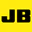

In [5]:
url = "https://www.jbhifi.com.au/search?query=laptop&page=" + str(4)
print(url)


options = webdriver.ChromeOptions()
options.add_argument('--headless')

#binary = ChromeBinary('C:/Program Files (x86)/Google/Chrome/Application/chrome.exe')
driver = webdriver.Chrome(#chrome_binary = binary, 
                          executable_path = r'C:\Users\Jin\Documents\Webscraping\Drivers\chromedriver.exe',
                          chrome_options = options
                         )
driver.get(url)

soup = BeautifulSoup(driver.page_source, 'lxml')
soup

In [6]:
with open('yourfile.txt', 'w') as f:
    f.write(soup.prettify())

## Infinite Scroll

In [7]:
## Not scrolling

options = webdriver.ChromeOptions()
options.add_argument('--headless')

driver = webdriver.Chrome(executable_path = r'C:\Users\Jin\Documents\Webscraping\Drivers\chromedriver.exe'
                         , chrome_options = options)
driver.get("https://www.reddit.com/search/?q=covid19")
urls = []
soup = BeautifulSoup(driver.page_source, "html.parser")

for parent in soup.find_all(class_ = "y8HYJ-y_lTUHkQIc1mdCq _2INHSNB8V5eaWp4P0rY_mE"):
    a_tag = parent.find("a", class_ = "SQnoC3ObvgnGjWt90zD9Z _2INHSNB8V5eaWp4P0rY_mE")
    base = "https://www.reddit.com/search/?q=covid19"
    link = a_tag.attrs['href']
    url = urljoin(base, link)
    urls.append(url)

print(len(urls))

C:\Users\Jin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


25


In [8]:
## Infinite Scrolling

options = webdriver.ChromeOptions()
options.add_argument('--headless')

driver = webdriver.Chrome(executable_path = r'C:\Users\Jin\Documents\Webscraping\Drivers\chromedriver.exe'
                         , chrome_options = options)
driver.get("https://www.reddit.com/search/?q=r%2FCOVID19")
time.sleep(2)  # Allow 2 seconds for the web page to open
scroll_pause_time = 1 # You can set your own pause time. My laptop is a bit slow so I use 1 sec
screen_height = driver.execute_script("return window.screen.height;")   # get the screen height of the web
i = 1

while True:
    # scroll one screen height each time
    driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height=screen_height, i = i))  
    i += 1
    time.sleep(scroll_pause_time)
    # update scroll height each time after scrolled, as the scroll height can change after we scrolled the page
    scroll_height = driver.execute_script("return document.body.scrollHeight;")  
    # Break the loop when the height we need to scroll to is larger than the total scroll height
    if (screen_height) * i > scroll_height:
        break 

##### Extract Reddit URLs #####
urls = []
soup = BeautifulSoup(driver.page_source, "html.parser")
for parent in soup.find_all(class_ = "y8HYJ-y_lTUHkQIc1mdCq _2INHSNB8V5eaWp4P0rY_mE"):
    a_tag = parent.find("a", class_ = "SQnoC3ObvgnGjWt90zD9Z _2INHSNB8V5eaWp4P0rY_mE")
    base = "https://www.reddit.com/search/?q=covid19"
    link = a_tag.attrs['href']
    url = urljoin(base, link)
    urls.append(url)

print(len(urls))

C:\Users\Jin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


186


## Sephora - Finding the Elements/Attributes

In [ ]:

from bs4 import BeautifulSoup
from selenium import webdriver
#import time
#from urllib.parse import urljoin
import pandas as pd # for storing data in a dataframe

In [5]:
## Scrap 1) Description, 2) Name and 3) Price, for a sample page

url = "https://www.sephora.com.au/search?q=foundation&page=" + str(1)
print(url)

options = webdriver.ChromeOptions()
options.add_argument('--headless')

driver = webdriver.Chrome(
                          executable_path = r'C:\Users\Jin\Documents\Webscraping\Drivers\chromedriver.exe',
                          chrome_options = options
                                )
driver.get(url)
soup_sephora = BeautifulSoup(driver.page_source, 'lxml')


https://www.sephora.com.au/search?q=foundation&page=1


C:\Users\Jin\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: use options instead of chrome_options
  # This is added back by InteractiveShellApp.init_path()


In [10]:
print(len(soup_sephora.find_all(class_ = "product-card-brand")))
print(len(soup_sephora.find_all(class_ = "product-card-product")))
print(len(soup_sephora.find_all(class_ = "product-price")))
#soup_sephora.find_all("span")

#product-card-brand
#product-card-product
#product-price


30
30
30


In [7]:
brand = []
description = []
price = []


url = "https://www.sephora.com.au/search?q=foundation&page=" + str(1)
print(url)

options = webdriver.ChromeOptions()
options.add_argument('--headless')

driver = webdriver.Chrome(
                                 executable_path = r'C:\Users\Jin\Documents\Webscraping\Drivers\chromedriver.exe',
                                 chrome_options = options
                                )
driver.get(url)
soup_sephora = BeautifulSoup(driver.page_source, 'lxml')

i = 0

for item in soup_sephora.findAll(class_ = "product-card-brand"):
    i = i + 1
    brand.append(item.get_text(strip = True))

for item in soup_sephora.findAll(class_ = "product-card-product"):
    i = i + 1
    description.append(item.get_text(strip = True))
            
for item in soup_sephora.findAll(class_ = "product-price"):
    i = i + 1
    price.append(item.get_text(strip = True))

driver.close()


https://www.sephora.com.au/search?q=foundation&page=1


C:\Users\Jin\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: use options instead of chrome_options
  


In [11]:
## Scrap 1) Description, 2) Name and 3) Price

brand = []
description = []
price = []


for i in range(2, 3):

      url = "https://www.sephora.com.au/search?q=foundation&page=" + str(i)
      print(url)


      options = webdriver.ChromeOptions()
      options.add_argument('--headless')

      #binary = FirefoxBinary('C:/Program Files/Mozilla Firefox/firefox.exe')
      driver = webdriver.Chrome(
                                 #firefox_binary = binary, 
                                 executable_path = r'C:\Users\Jin\Documents\Webscraping\Drivers\chromedriver.exe',
                                 chrome_options = options
                                )
      driver.get(url)

      soup = BeautifulSoup(driver.page_source, 'lxml')

      ii = 0

      for item in soup.findAll(class_ = "product-card-brand"):
            ii = ii + 1
            brand.append(item.get_text(strip = True))

      for item in soup.findAll(class_ = "product-card-product"):
            ii = ii + 1
            description.append(item.get_text(strip = True))
            
      for item in soup.findAll(class_ = "product-price"):
            ii = ii + 1
            price.append(item.get_text(strip = True))

      driver.close()



https://www.sephora.com.au/search?q=foundation&page=2


C:\Users\Jin\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: use options instead of chrome_options


In [10]:
df_sephora = pd.DataFrame(
                        {'Brand': brand,
                         'Description': description,
                         'Price': price
                        })

df_sephora.head(10)

,Brand,Description,Price
0,Natasha Denona,Foundation X + Full Coverage Fruit Complex,$73.00
1,War Paint For Men,Foundation,$47.00
2,Vapour Beauty,Foundation Brush,$70.00
3,ZOEVA,Authentik Skin Foundation,$49.00$24.50(50%)
4,tarte,Face Tape Foundation,$64.00
5,Vapour Beauty,Luminous Foundation,$70.00
6,Anastasia Beverly Hills,Luminous Foundation,$71.00
7,Sephora Collection,Matte Perfection Liquid Foundation,$32.00$16.00(50%)
8,Beautyblender,Bounce Liquid Whip Long Wear Foundation,$61.00$18.30(70%)
9,Sephora Collection,10HR Wear Perfection Foundation,$32.00$16.00(50%)


## Farfetch - Infinite Scroll Scrape

### Finding Elements

In [19]:
url_acne = "https://www.acnestudios.com/au/en/search?q=bags"
print(url_acne)

options = webdriver.ChromeOptions()
options.add_argument('--headless')

driver_acne = webdriver.Chrome(
                          #firefox_binary = binary, 
                          executable_path = r'C:\Users\Jin\Documents\Webscraping\Drivers\chromedriver.exe',
                          chrome_options = options
                                )
driver_acne.get(url_acne)
soup_acne = BeautifulSoup(driver_acne.page_source, 'html.parser')

https://www.acnestudios.com/au/en/search?q=bags


C:\Users\Jin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.


In [1]:
soup_acne.find_all("p")


NameError: name 'soup_acne' is not defined

In [28]:
print(len(soup_acne.find_all(class_ = "product-tile__name")))
print(len(soup_acne.find_all(class_ = "product-tile__price font--monospace")))
print(len(soup_acne.find_all(class_ = "tile__link")))

12
12
12


### Infinite Scroll

In [16]:
## Not scrolling

options = webdriver.ChromeOptions()
options.add_argument('--headless')

driver = webdriver.Chrome(executable_path = r'C:\Users\Jin\Documents\Webscraping\Drivers\chromedriver.exe'
                         , chrome_options = options)
driver.get("https://www.acnestudios.com/au/en/search?q=bags")


description = []
soup = BeautifulSoup(driver.page_source, "html.parser")

for desc in soup.find_all(class_ = "product-tile__name"):
    
    description.append(desc.get_text(strip = True))

print(len(description))

C:\Users\Jin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


12


In [2]:
## Infinite Scrolling

options = webdriver.ChromeOptions()
options.add_argument('--headless')

driver = webdriver.Chrome(executable_path = r'C:\Users\Jin\Documents\Webscraping\Drivers\chromedriver.exe'
                         , chrome_options = options)
url_acne = "https://www.acnestudios.com/au/en/search?q=bags"
print(url_acne)

driver.get(url_acne)

time.sleep(2)  # Allow 2 seconds for the web page to open
scroll_pause_time = 1 # You can set your own pause time. My laptop is a bit slow so I use 1 sec
screen_height = driver.execute_script("return window.screen.height;")   # get the screen height of the web

i = 1

while True:
    # scroll one screen height each time
    driver.execute_script("window.scrollTo(0, {screen_height}*{i});".format(screen_height = screen_height, i = i))  
    i += 1
    time.sleep(scroll_pause_time)
    # update scroll height each time after scrolled, as the scroll height can change after we scrolled the page
    scroll_height = driver.execute_script("return document.body.scrollHeight;")  
    # Break the loop when the height we need to scroll to is larger than the total scroll height
    if (screen_height) * i > scroll_height:
        break 


description = []
price = []
url = []
soup = BeautifulSoup(driver.page_source, "html.parser")

for desc in soup.find_all(class_ = "product-tile__name"):
    
    description.append(desc.get_text(strip = True))
    
for desc in soup.find_all(class_ = "product-tile__price font--monospace"):
    
    price.append(desc.get_text(strip = True))
    
for item in soup.find_all(class_ = "tile__link"):
    
    base = "https://www.acnestudios.com/"
    link = item.attrs["href"]
    url_join = urljoin(base, link)
    
    url.append(url_join)

print(len(description))
print(len(price))
print(len(url))

C:\Users\Jin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


https://www.acnestudios.com/au/en/search?q=bags
95
95
95


In [3]:
df_acne = pd.DataFrame(
                        {
                         'Description': description,
                         'Price': price,
                         'URL': url
                        })

df_acne

,Description,Price,URL
0,Distortion mini bag,1 450 AUD,https://www.acnestudios.com/au/en/distortion-m...
1,Distortion mini bag,1 450 AUD,https://www.acnestudios.com/au/en/distortion-m...
2,Distortion handbag,1 850 AUD,https://www.acnestudios.com/au/en/distortion-h...
3,Distortion handbag,1 850 AUD,https://www.acnestudios.com/au/en/distortion-h...
4,Mini shoulder bag,700 AUD,https://www.acnestudios.com/au/en/mini-shoulde...
...,...,...,...
90,Leather handbag,1 850 AUD,https://www.acnestudios.com/au/en/leather-hand...
91,Micro Backpack,150 AUD,https://www.acnestudios.com/au/en/micro-backpa...
92,Face backback,320 AUD,https://www.acnestudios.com/au/en/face-backbac...
93,Furry fleece backpack,660 AUD,https://www.acnestudios.com/au/en/furry-fleece...


In [33]:
df_acne.to_csv("check.csv")

## Image Scrape

In [34]:
url_manga = "https://v2.mangapark.net/manga/h2/i294559/c2"
print(url_manga)

options = webdriver.ChromeOptions()
options.add_argument('--headless')

driver_manga = webdriver.Chrome(
                          #firefox_binary = binary, 
                          executable_path = r'C:\Users\Jin\Documents\Webscraping\Drivers\chromedriver.exe',
                          chrome_options = options
                                )
driver_acne.get(url_manga)
soup_manga = BeautifulSoup(driver_manga.page_source, 'html.parser')

https://v2.mangapark.net/manga/h2/i294559/c2


C:\Users\Jin\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: use options instead of chrome_options
  # Remove the CWD from sys.path while we load stuff.


In [35]:
soup_manga

<html><head></head><body></body></html>